### Exercice 1

In [11]:
1.

#Définir la fonction f(x) qui sera appelée lors de l'affichage de la fonction
def f(x):
    y = x
    return y

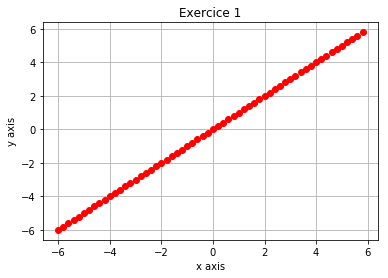

In [12]:
2.

%matplotlib inline   
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-6,6,0.2) #Liste x de -6 à 6 avec un pas de 0.2

y = f(x) #On applique la fonction f(x) sur la liste x pour obtenir la liste y

plt.plot(x,y,'ro')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Exercice 1')
plt.grid(True)
plt.show()


In [13]:
3.

#Définir la nouvelle fonction f(x)
def f(x):
    y=(np.exp(x))/((np.exp(x))+1)
    return y

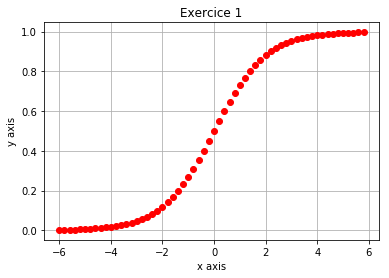

In [14]:
4.

x = np.arange(-6,6,0.2) #Liste x de -6 à 6 avec un pas de 0.2

y = f(x) #On applique la nouvelle fonction f(x) sur la liste x pour obtenir la liste y

plt.plot(x,y,'ro')
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.title('Exercice 1')
plt.grid(True)
plt.show()

### Exercice 2

In [15]:
import cv2
import os

In [16]:
1.

cvsFile = open('GTI770_label_data_set.csv', 'r') # option r veut dire read

In [17]:
2.

count = 0
X = np.zeros((100, 3, 424, 424)) #Initialiser les matrices avec des 0 en indiquant leurs tailles
Y = np.zeros((100, 1), dtype = object)

for i in cvsFile:
    name, i = i.split(',') #Séparer les tables en 'name' et 'i'
    if name != "id":
        imagePath = 'images_training/' + name + '.jpg'
        if not os.path.exists(imagePath):
            continue
        img = cv2.imread(imagePath) #Mettre l'image du path dans img
        img = img.reshape(3, 424, 424) #Reshape l'img pour qu'elle soit dans le bon size de la matrice
        X[count] = img #Mettre les valeurs dans les matrices
        Y[count] = i.rstrip()
        count += 1
        if count == 100: #Arreter après 100
            break


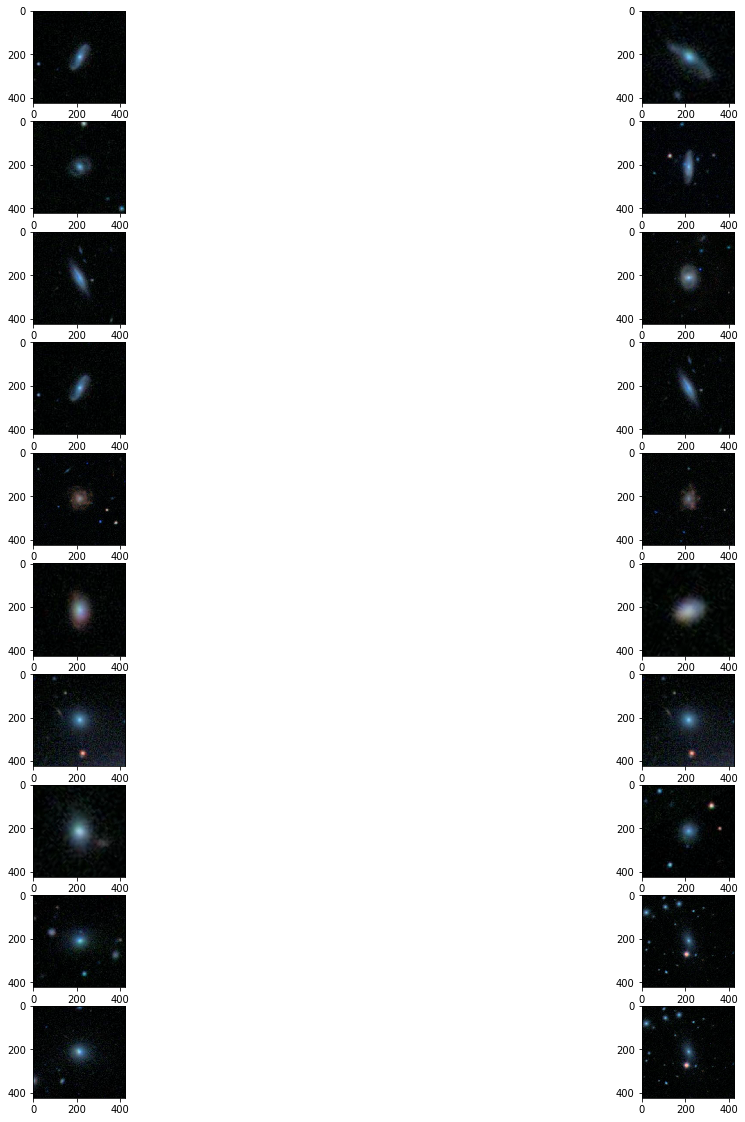

In [18]:
3.

countSmooth = 1
countSpiral = 1

fig = plt.figure(figsize=(20, 20)) #Initialise la figure qui placera les images

while countSmooth <= 10 or countSpiral <= 10: #Cette fonction continue jusqu'à ce qu'il y ait 10 images smooth et 10 images spiral
    randNumber = np.random.randint(0,99) #Un nombre aléatoire
    randImage = X[randNumber].astype(int) #Utilisation du nombre aléatoire pour obtenir une image aléatoire
    if Y[randNumber] == ['spiral'] and countSpiral <= 10:
        randImage = randImage.reshape(424,424,3)
        fig.add_subplot(10, 2, countSpiral) #Ajout de l'image aléatoire dans les premières 10 (spiral)
        plt.imshow(randImage)
        countSpiral += 1
    elif Y[randNumber] == ['smooth'] and countSmooth <= 10:
        randImage = randImage.reshape(424,424,3)
        fig.add_subplot(10, 2, 10 + countSmooth) #Ajout de l'image aléatoire dans les dernieères 10 (smooth)
        plt.imshow(randImage)
        countSmooth += 1

In [19]:
4.

count = 0
countTrain = 0
countTest = 0
countSpiralRatio = 0
countSmoothRatio = 0

X_train = np.zeros((70, 3, 424, 424)) #Initialiser les matrices avec des 0 en indiquant leurs tailles
X_test = np.zeros((30, 3, 424, 424)) #Les train ont une taille de 70 et les test de 30
Y_train = np.zeros((70, 1), dtype=object)
Y_test = np.zeros((30, 1), dtype=object)

while count < 100: #On boucle les 100 images
    if Y[count] == ['spiral']: #Si c'est une spiral, on regarde si ca fait moins de 35 spirales (70%),
                               #si oui, on l'ajoute au train, sinon au test. On ajoute ensuite 1 au count
                               #de celui choisi et 1 au count de spiral
        if countSpiralRatio < 35:
            X_train[countTrain] = X[count]
            Y_train[countTrain] = Y[count]
            countTrain += 1
        else:
            X_test[countTest] = X[count]
            Y_test[countTest] = Y[count]
            countTest += 1
        countSpiralRatio += 1
        
    elif Y[count] == ['smooth']:
        if countSmoothRatio < 35:
            X_train[countTrain] = X[count]
            Y_train[countTrain] = Y[count]
            countTrain += 1
        else:
            X_test[countTest] = X[count]
            Y_test[countTest] = Y[count]
            countTest += 1
        countSmoothRatio += 1
        
    count += 1

In [20]:
5.

cropx = 50 #Initialiser les variables de crop qui ont pour effet de déterminer la dimension finale
cropy = 50
countCrop = 0

z = np.zeros((70, 3, 50, 50)) #Initialiser la matricea avec des 0 en indiquant sa taille

while countCrop < 70:
    image = X_train[countCrop].reshape(424,424,3) #Reshape de l'image pour la cropper
    x,y,c = image.shape #On lui soutire ses dimensions
    startx = x//2 - cropx//2 #On modifie les dimensions selon le crop ( sauf RGB) Code de référence: https://stackoverflow.com/questions/39382412/crop-center-portion-of-a-numpy-image
    starty = y//2 - cropy//2
    image = image[startx:startx+cropx, starty:starty+cropy, :].astype(int) #On rentre les débuts/fin des valeurs que nous allons garder
    image = image.reshape(3,50,50) #Reshape pour remettre l'image dans une matrice
    X_train_crop[countCrop] = image
    countCrop += 1
    



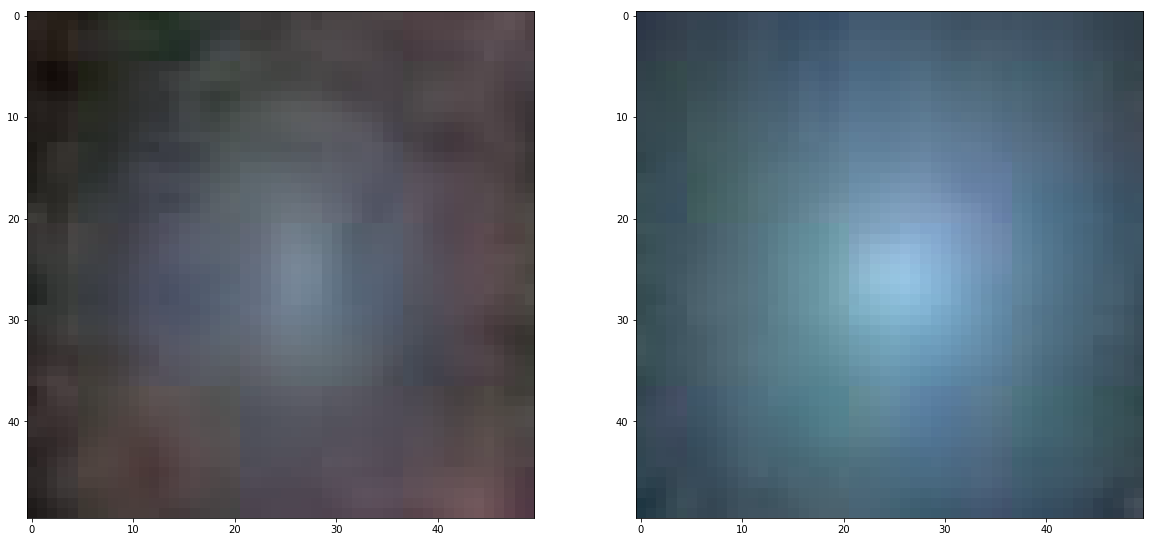

In [21]:
6.

spiral = 0 #Variables qui servent à savoir lorsque une image de chaque classe a bien été affichée
smooth = 0
count = 0

fig = plt.figure(figsize=(20, 20)) #Initialise la figure qui placera les images

while spiral == 0 or smooth == 0: #Boucle les images jusqu'à avoir trouver un de chaque classe
    if  Y[count] == ['spiral'] and spiral == 0: #Boucle qui affiche l'image spiral
        fig.add_subplot(1, 2, 1)
        image = X_train_crop[count].astype(int)
        plt.imshow(image.reshape(50,50,3))
        spiral = 1
    if  Y[count] == ['smooth'] and smooth == 0: #Boucle qui affiche l'image smooth
        fig.add_subplot(1, 2, 2)
        image = X_train_crop[count].astype(int)
        plt.imshow(image.reshape(50,50,3))
        smooth = 1
    count += 1

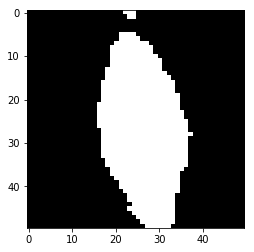

In [29]:
7.

count = 0
threshold = (255+255+255)/2 #Limite entre mettre un pixel noir et un blanc (valeurs rgb additionnés)
X_train_binary = np.zeros((70, 3, 50, 50)) #Initialiser la matrice avec des 0 en indiquant sa taille



while count < 70:
    img = X_train_crop[count].astype(int).reshape(50,50,3)
    shape = np.shape(img)
    
    for i in range(shape[1]): #Map les 2 dimensions de l'image (sauf la dimension rgb) pour avoir chaque pixel
        for j in range(shape[0]):
            r,g,b = img[i,j] #Sort les valeurs rgb de ce pixel
            if r + g + b < threshold: #Si le rgb est sous le threshold, mettre un pixel noir
                img[i,j] = 0,0,0
                r,g,b = img[i,j]
            else:
                img[i,j] = 255,255,255 #Sinon, mettre un pixel blanc
                r,g,b = img[i,j]
    img = img.reshape(3,50,50)
    X_train_binary[count] = img #Mettre l'image en binaire dans le nouveau tableau
    count += 1
    
plt.imshow(X_train_binary[40].reshape(50, 50, 3).astype(np.int64))

In [13]:
8.

count = 0
whitePixelCount = 0

X_train_plot = np.zeros((70, 2)) #Initialiser la matrice avec des 0 en indiquant sa taille

while count < 70:
    img = X_train_binary[count].astype(int).reshape(50,50,3) #Sélectionne chaque image
    shape = np.shape(img)
    for i in range(shape[1]): #Map les 2 dimensions de l'image (sauf la dimension rgb) pour avoir chaque pixel
            for j in range(shape[0]):
                r,g,b = img[i,j] #Sort les valeurs rgb de ce pixel
                if r + g + b != 0: #Si le rgb n'est pas égal à 0, ajouter un pixel blanc
                    whitePixelCount += 1
    X_train_plot[count][0] = 2500 - whitePixelCount
    X_train_plot[count][1] = whitePixelCount
    whitePixelCount = 0 #Remettre à 0 pour la prochaine image
    count += 1

#La matrice X_train_plot sert à informer si il y a beaucoup ou peu de couleurs dans une image.

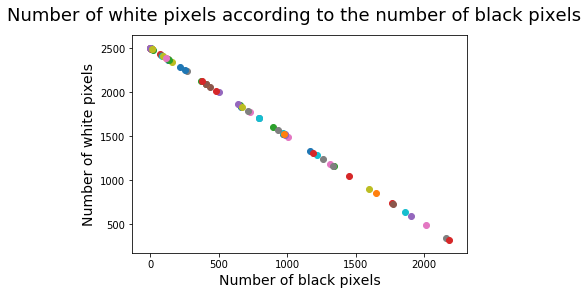

In [27]:
9.

for img in X_train_plot: #Pour chaque image contenue dans X_train_plot

    plt.scatter(img[0], img[1]) #Place les valeurs du point dans le plt

plt.suptitle('Number of white pixels according to the number of black pixels', fontsize=18) #Ajout du titre et des titres des axes
plt.xlabel('Number of black pixels', fontsize=14)
plt.ylabel('Number of white pixels', fontsize=14)

plt.show() #Dessine le plt contenant les points